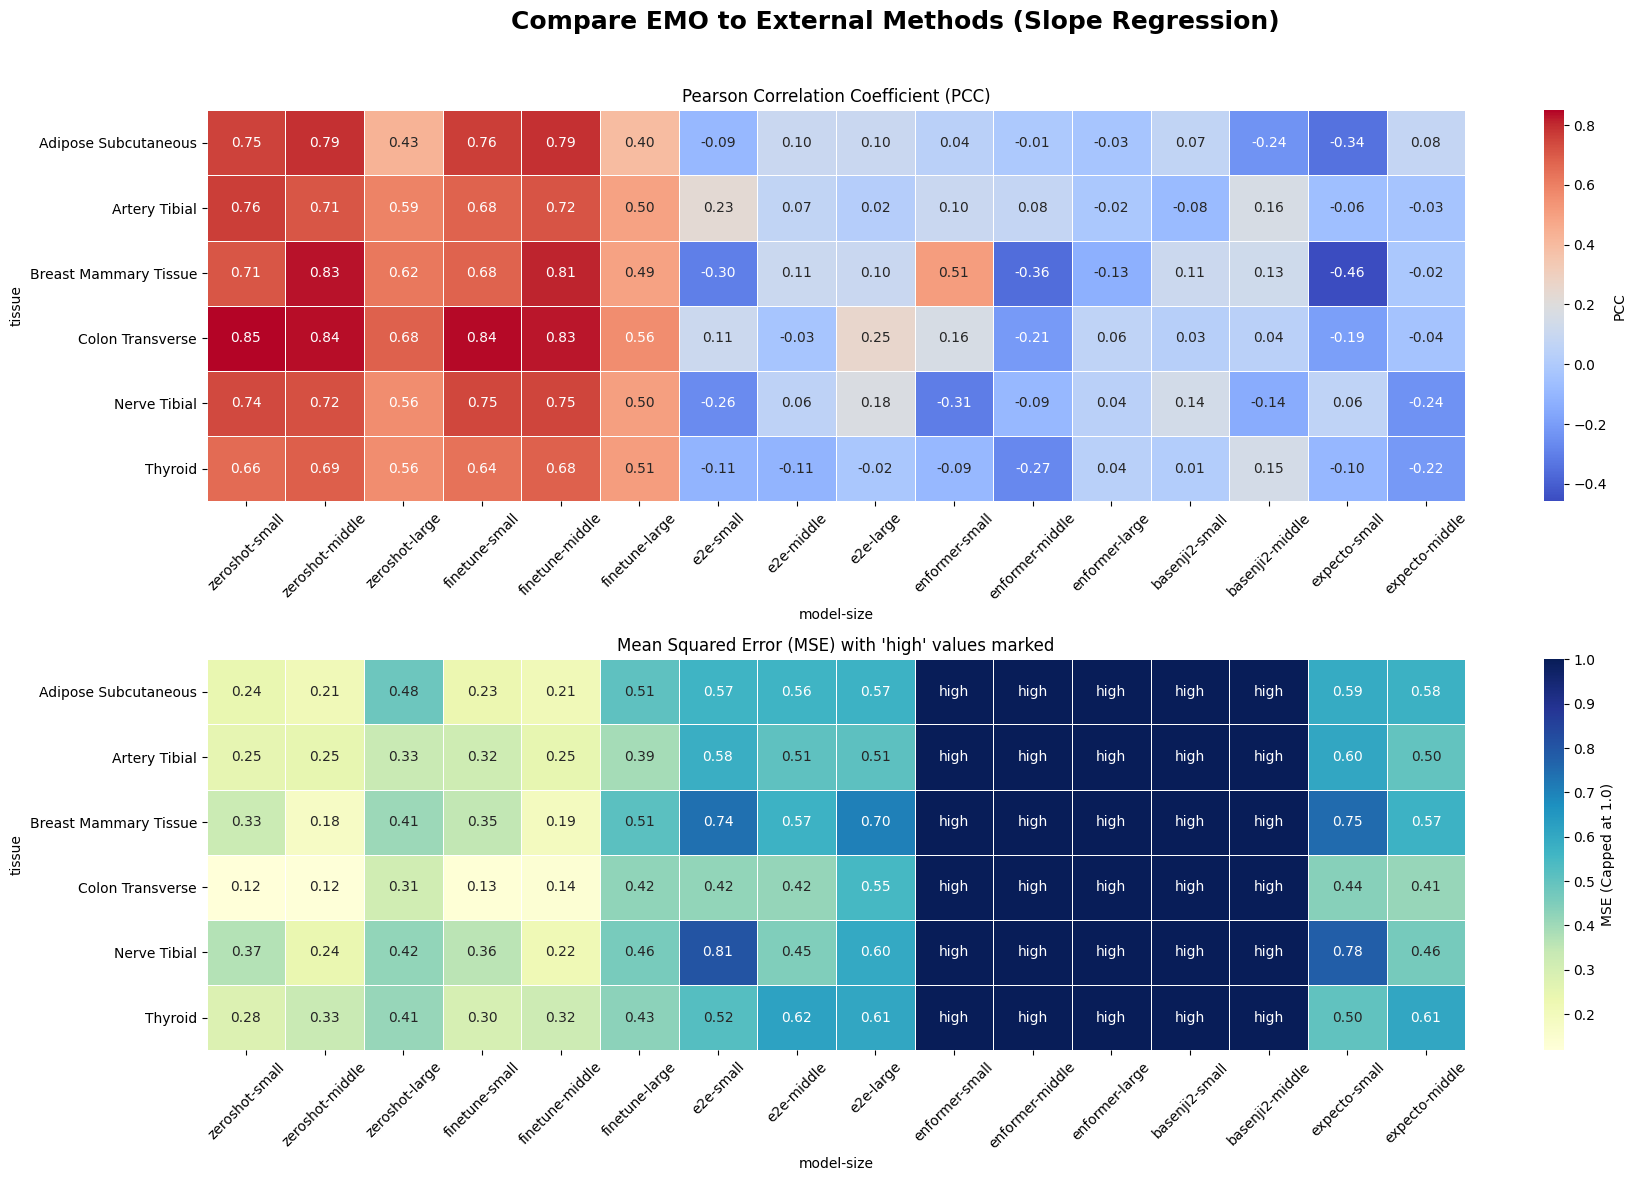

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated file uploaded by user
df = pd.read_csv('comparison_table_filled.csv')

# Standardize tissue names for better plotting
df['tissue'] = df['tissue'].str.replace('_', ' ')

# Define model order
model_order = ['zeroshot', 'finetune', 'e2e', 'enformer', 'basenji2', 'expecto']
size_order = ['small', 'middle', 'large']

# Sort the dataframe
df['model'] = pd.Categorical(df['model'], categories=model_order, ordered=True)
df['size'] = pd.Categorical(df['size'], categories=size_order, ordered=True)
df = df.sort_values(['tissue', 'model', 'size'])

# Cap MSE values for visualization
df['mse_numeric'] = pd.to_numeric(df['mse'], errors='coerce')
df['mse_capped'] = df['mse_numeric'].apply(lambda x: min(x, 1.0) if pd.notnull(x) else np.nan)
df['mse_annot'] = df['mse_numeric'].apply(lambda x: 'high' if x > 1 else f"{x:.2f}" if pd.notnull(x) else "")

# Create pivot tables
pivot_pcc = df.pivot_table(index='tissue', columns=['model', 'size'], values='pcc')
pivot_mse = df.pivot_table(index='tissue', columns=['model', 'size'], values='mse_capped')
pivot_mse_annot = df.pivot_table(index='tissue', columns=['model', 'size'], values='mse_annot', aggfunc=lambda x: x)

# Create a single figure with two subplots: one for PCC and one for MSE
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Plot PCC heatmap
sns.heatmap(pivot_pcc, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"label": "PCC"}, ax=axes[0])
axes[0].set_title("Pearson Correlation Coefficient (PCC)")
axes[0].tick_params(axis='x', rotation=45)

# Plot MSE heatmap
sns.heatmap(pivot_mse, annot=pivot_mse_annot, fmt="", cmap="YlGnBu", linewidths=0.5, cbar_kws={"label": "MSE (Capped at 1.0)"}, ax=axes[1])
axes[1].set_title("Mean Squared Error (MSE) with 'high' values marked")
axes[1].tick_params(axis='x', rotation=45)

# Set overall title
fig.suptitle("Compare EMO to External Methods (Slope Regression)", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.savefig('../images/slope.png',dpi=300, bbox_inches = 'tight')
plt.show()
